<a href="https://colab.research.google.com/github/AmanPriyanshu/py-stochastic-outlier-selection/blob/master/SOS_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from math import exp

In [0]:
def dissimilarity_matrix(data):
	dissimilarity_matrix = np.empty([data.shape[0], data.shape[0]])
	for i in range(len(data)):
		for j in range(len(data)):
			d_ij = np.sum(np.square(data[i]-data[j]))
			dissimilarity_matrix[i][j] = d_ij

	return dissimilarity_matrix


In [0]:
def affinity_matrix(dMatrix, perplexity):
  variance_matrix = np.empty(dMatrix.shape[0])
  affinity_matrix = np.empty(dMatrix.shape)
  for i in range(dMatrix.shape[0]):
    variance = 0.0001
    tempPerplexity = 0
    while tempPerplexity <= perplexity:
      a_i = [0 if i==j else exp(-(dMatrix[i][j]/(2*variance))**2) for j in range(dMatrix.shape[1])]
      tempPerplexity = sum(a_i)
      variance += 0.001
    variance_matrix[i] = variance
  for i,variance in zip(range(dMatrix.shape[0]), variance_matrix):
    for j in range(dMatrix.shape[1]):
      if i != j:
        affinity_matrix[i][j] = exp(-(dMatrix[i][j]/(2*variance))**2)
      else: 
        affinity_matrix[i][j] = 0
  return variance_matrix, affinity_matrix

In [0]:
def binding_matrix(aMatrix):
	binding_matrix = np.empty(aMatrix.shape)
	for i in range(aMatrix.shape[0]):
		for j in range(aMatrix.shape[1]):
			binding_matrix[i][j] = aMatrix[i][j]/np.sum(aMatrix[i])

	return binding_matrix

In [0]:
def outlier_probability(bMatrix):
	outlier_matrix = np.empty(bMatrix.shape[0])
	for i in range(bMatrix.shape[0]):
		condition = [(1-bMatrix[j][i]) for j in range(bMatrix.shape[0])]
		outlier_matrix[i] = np.prod(condition)
	return outlier_matrix

In [0]:
 def sos(cleaned_data): 
  dMatrix = dissimilarity_matrix(cleaned_data)
  variance_matrix, affinity_matrix = affinity_matrix(dMatrix, 50)
  binding_matrix = binding_matrix(affinity_matrix)
  outlier_matrix = outlier_probability(binding_matrix)

In [0]:
def scatter_plot(X, Y):
  plt.scatter(X, Y, label= "stars", color= "green", marker= "*", s=10) 
  plt.xlabel('x - axis')
  plt.ylabel('y - axis')
  plt.title('My scatter plot!')
  plt.legend()
  plt.show() 

In [0]:
def data_generation():
  data = [[randint(0,100), randint(0,100)] if i%10 != 0 else [randint(500,1000), randint(500,1000)] for i in range(50)]
  print(data)
  data = np.array(data)
  return data


In [0]:
def feature_normalizer(data):
  normalized_data = [(i-min(i))/(max(i)-min(i)) for i in data.T]
  normalized_data = np.array(normalized_data)
  return normalized_data.T

[[622, 807], [21, 3], [58, 25], [71, 58], [25, 41], [96, 92], [94, 15], [70, 71], [49, 16], [60, 83], [961, 842], [44, 60], [99, 34], [32, 20], [70, 43], [57, 86], [64, 15], [85, 96], [68, 48], [71, 43], [877, 645], [64, 7], [3, 47], [6, 14], [56, 94], [56, 54], [40, 23], [72, 2], [100, 6], [43, 51], [778, 916], [36, 85], [19, 68], [26, 81], [14, 84], [32, 26], [14, 88], [29, 54], [36, 67], [28, 96], [519, 575], [51, 67], [24, 1], [73, 82], [27, 89], [12, 96], [68, 56], [64, 36], [69, 97], [41, 35]]


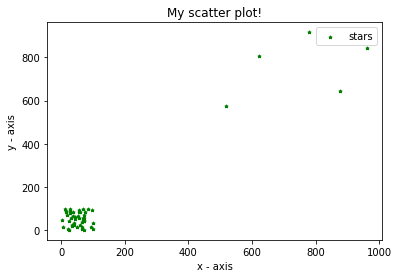

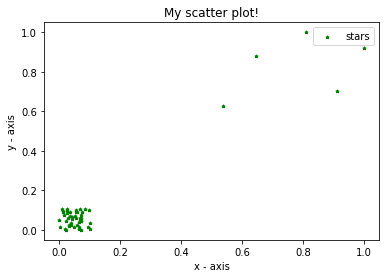

In [54]:
#data = data_generation()
X = data.T[0]
Y = data.T[1]
scatter_plot(X, Y)
n_data = feature_normalizer(data)
X = n_data.T[0]
Y = n_data.T[1]
scatter_plot(X, Y)

In [0]:
d_matrix = dissimilarity_matrix(n_data)

In [89]:
variance_matrix, a_matrix = affinity_matrix(d_matrix, 25)
print(a_matrix.tolist()[0])
print(a_matrix.tolist()[49])

[0.0, 0.3844380658955751, 0.44215001038016866, 0.49420954517064286, 0.43402963761449065, 0.5569427205061638, 0.45836540565561756, 0.5094874526141657, 0.4235076156103111, 0.5156650141236157, 0.9887725899144846, 0.4737107021984532, 0.48666560687449684, 0.4143282755846238, 0.47462559359815537, 0.5167169639058287, 0.4344937766183853, 0.5527080302507346, 0.47922798299129893, 0.4754519083944253, 0.9926786438063397, 0.4244182741432511, 0.42198344538290605, 0.3851267335797811, 0.5255178858824356, 0.47660432588191765, 0.4247214204188721, 0.42446640494760857, 0.4514166605502623, 0.461797596928809, 0.9988348052047265, 0.49705030588550475, 0.4614206268295525, 0.48330482331966146, 0.4760281923477615, 0.4216875519706659, 0.48077583255209144, 0.4533333577062687, 0.4752820723437162, 0.5030154051185276, 0.9959606305299136, 0.4883424422077754, 0.38448426824672205, 0.5255479467794557, 0.49377563187493906, 0.48839375341884794, 0.48920891609511474, 0.46088424961541347, 0.5403757704402486, 0.440377141827751

In [90]:
b_matrix = binding_matrix(a_matrix)
print(b_matrix.tolist()[0])
print(b_matrix.tolist()[49])

[0.0, 0.015339289754466249, 0.01764202800355346, 0.019719232004602388, 0.017318020674890938, 0.022222320119582854, 0.018289031171759174, 0.020328828893953536, 0.01689818622392681, 0.020575316987552543, 0.039452568836125974, 0.018901316923146505, 0.019418224727539894, 0.016531925520578476, 0.018937821591957612, 0.02061729036102409, 0.01733654007580017, 0.0220533536549922, 0.019121459453884344, 0.018970792005693463, 0.03960842252950087, 0.016934521999031713, 0.01683737099560432, 0.015366767972909482, 0.02096845197659182, 0.01901677409572812, 0.016946617701752785, 0.01693644244453295, 0.018011772429567068, 0.018425977486660607, 0.0398540567469271, 0.01983257991573304, 0.018410936172872403, 0.019284127619779323, 0.018993786051614697, 0.016825564686111485, 0.019183219500600864, 0.01808824969770401, 0.01896401545408817, 0.020070590647933362, 0.039739375600461556, 0.019485131377347756, 0.015341133253626326, 0.02096965142287609, 0.019701918626033568, 0.019487178722821887, 0.019519704160850904,

In [92]:
out = outlier_probability(b_matrix)
print(out.tolist())

[0.8507120248410921, 0.4369334180665258, 0.30205719685134735, 0.27497502196711276, 0.28671997605298066, 0.43834091119697904, 0.43091953328907634, 0.2871996848711398, 0.3314955141068642, 0.30339443639681535, 0.8568333031889035, 0.260124012750042, 0.3902176156526704, 0.32716206350627597, 0.2788515827311762, 0.3109007050869627, 0.3445747514649455, 0.4077376087804317, 0.2714049454140168, 0.280555094891974, 0.8519230861532169, 0.3828772088371563, 0.35466754018618124, 0.4366029476774262, 0.33988329974633597, 0.25865424961477357, 0.30816597793762796, 0.42264422517810685, 0.5021845892539978, 0.25877061836594883, 0.8535567501759059, 0.3144319446591278, 0.30529745493780747, 0.31874624858989, 0.36248505565540046, 0.30738552871047464, 0.37778126038288423, 0.27196326623784006, 0.2724630676020663, 0.37123066566374613, 0.8516960448494598, 0.2655836540979014, 0.44014368894577494, 0.31827433167819486, 0.3432664948274266, 0.41954602286135534, 0.26974744764598757, 0.28082830816074794, 0.36881577363715934

In [95]:
outliers = []
for i in range(len(out.tolist())):
  if out[i] >= 0.8:
    outliers.append(data[i])
    print(i)

print(outliers)

0
10
20
30
40
[array([622, 807]), array([961, 842]), array([877, 645]), array([778, 916]), array([519, 575])]


In [0]:
<code>
dissimilarity_matrix = np.empty([data.shape[0], data.shape[0]])<br>
for i in range(len(data)):
<pre class="tab">    for j in range(len(data)):</pre>
<pre class="tab"><pre class="tab">        d_ij = np.sum(np.square(data[i]-data[j]))</pre></pre>
<pre class="tab"><pre class="tab"> 
       dissimilarity_matrix[i][j] = d_ij</pre></pre>
<pre class="tab">return dissimilarity_matrix</pre></code>
